# Heatmap correlations for feature and target variables

In [1]:
# import dependencies
import seaborn as sns
import numpy as np
from numpy import triu
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pylab import savefig

%matplotlib inline

In [2]:
# load files
df = pd.read_csv("govRespOutcomes_clusters.csv")
display(df)
df.columns

,country,primary_key,iso_code,population,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,interval_firstNCToMaxNC,...,PC 3,Class,logPercent_maxND,logPercent_NC_3mnth,logPercent_ND_3mnth,logPercent_TD_3mnth,logPercent_TC_3mnth,logPercent_maxNC,logInterval_maxNC,logInterval_maxND
0,Afghanistan,AFG2020-08-31,AFG,38928341.0,54.422,18.6,0.000,42,-5,76,...,-0.550939,0,-3.842078,-4.071752,-5.039920,-5.590266,-3.715205,-2.563733,1.880814,2.123852
1,Albania,ALB2020-08-31,ALB,2877800.0,104.871,38.0,0.000,78,0,169,...,1.666770,0,-3.680909,-3.680909,-5.177977,-3.116638,-1.875862,-2.208641,2.227887,2.143015
2,Algeria,DZA2020-08-31,DZA,43851043.0,17.348,29.1,0.000,149,-15,135,...,1.208069,0,-4.018731,-3.829067,-3.699279,-4.244040,-3.077314,-2.812676,2.130334,1.579784
3,Angola,AGO2020-08-31,AGO,32866268.0,23.890,16.8,0.000,16,-2,135,...,-0.890229,2,-4.738599,-2.250282,-4.230853,-5.215720,-4.136539,-3.261478,2.130334,2.113943
4,Argentina,ARG2020-08-31,ARG,45195777.0,16.177,31.9,0.000,21,0,179,...,0.546956,2,-3.145895,-1.897266,-5.517696,-4.123619,-2.600868,-1.585800,2.252853,2.243038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela,VEN2020-08-31,VEN,28435943.0,36.253,29.0,0.000,99,0,150,...,0.287195,2,NaN,NaN,NaN,NaN,-3.177406,-2.124877,NaN,NaN
158,Vietnam,VNM2020-08-31,VNM,97338583.0,308.127,32.6,6171.884,71,-5,184,...,0.352515,2,NaN,NaN,NaN,NaN,-4.784165,-4.289315,NaN,NaN
159,Yemen,YEM2020-08-31,YEM,29825968.0,53.508,20.3,0.000,21,0,67,...,-1.439579,0,NaN,NaN,NaN,NaN,-3.943116,-3.410137,NaN,NaN
160,Zambia,ZMB2020-08-31,ZMB,18383956.0,22.995,17.7,0.000,44,0,121,...,-0.869589,0,NaN,NaN,NaN,NaN,-3.548436,-2.542628,NaN,NaN


Index(['country', 'primary_key', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'interval_GRRamp',
       'interval_GRToFirstNC', 'interval_firstNCToMaxNC',
       'interval_firstNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'PC 1', 'PC 2', 'PC 3', 'Class', 'logPercent_maxND',
       'logPercent_NC_3mnth', 'logPercent_ND_3mnth', 'logPercent_TD_3mnth',
       'logPercent_TC_3mnth', 'logPercent_maxNC', 'logInterval_max

In [3]:
# create df for just heatmap variables
columns = [
       'population_density', 'median_age', 'gdp_per_capita','interval_GRRamp', 'interval_GRToFirstNC',
       'interval_firstNCToMaxNC',
       'index_avgMaxGRStartApr1',
       'index_string', 'index_health', 'index_econ','percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'mobil_residential', 'mobil_outdoors']

print(len(columns))

heatmap_df = df[columns]
display(heatmap_df)

# fill null values with zero
display(heatmap_df.isnull().sum())
heatmap_df = heatmap_df.fillna(0)
display(heatmap_df.isnull().sum())

18


,population_density,median_age,gdp_per_capita,interval_GRRamp,interval_GRToFirstNC,interval_firstNCToMaxNC,index_avgMaxGRStartApr1,index_string,index_health,index_econ,percent_maxNC,percent_maxND,percent_NC_3mnth,percent_ND_3mnth,percent_TC_3mnth,percent_TD_3mnth,mobil_residential,mobil_outdoors
0,54.422,18.6,0.000,42,-5,76,60.578889,77.056601,71.595294,0.000000,0.002731,0.000144,0.000085,0.000000,0.000193,0.000003,9.333333,-21.192308
1,104.871,38.0,0.000,78,0,169,68.489542,71.082157,69.281699,64.133987,0.006185,0.000208,0.000208,0.000000,0.013309,0.000764,0.000000,0.000000
2,17.348,29.1,0.000,149,-15,135,66.171046,77.349804,70.179869,44.117647,0.001539,0.000096,0.000148,0.000009,0.000837,0.000057,0.000000,0.000000
3,23.890,16.8,0.000,16,-2,135,67.044379,79.376863,71.983987,39.869281,0.000548,0.000018,0.000000,0.000000,0.000073,0.000006,20.988889,-34.142910
4,16.177,31.9,0.000,21,0,179,85.190196,91.496536,87.041569,75.000000,0.025954,0.000715,0.000000,0.000007,0.002507,0.000075,18.844000,-51.925661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,36.253,29.0,0.000,99,0,150,72.385621,84.127516,76.455817,50.000000,0.007501,0.000060,0.000028,0.000000,0.000665,0.000032,17.955556,-46.002222
158,308.127,32.6,6171.884,71,-5,184,67.005033,68.959869,73.456863,31.535948,0.000051,0.000004,0.000000,0.000000,0.000016,0.000000,9.433304,-21.406215
159,53.508,20.3,0.000,21,0,67,32.003750,46.230000,37.827153,0.000000,0.000389,0.000174,0.000000,0.000000,0.000114,0.000023,6.155556,-7.180000
160,22.995,17.7,0.000,44,0,121,48.770523,50.076405,53.093987,25.000000,0.002867,0.000218,0.000022,0.000000,0.000283,0.000011,11.311111,-8.420000


population_density         0
median_age                 0
gdp_per_capita             0
interval_GRRamp            0
interval_GRToFirstNC       0
interval_firstNCToMaxNC    0
index_avgMaxGRStartApr1    0
index_string               0
index_health               0
index_econ                 0
percent_maxNC              0
percent_maxND              0
percent_NC_3mnth           0
percent_ND_3mnth           0
percent_TC_3mnth           0
percent_TD_3mnth           0
mobil_residential          0
mobil_outdoors             0
dtype: int64

population_density         0
median_age                 0
gdp_per_capita             0
interval_GRRamp            0
interval_GRToFirstNC       0
interval_firstNCToMaxNC    0
index_avgMaxGRStartApr1    0
index_string               0
index_health               0
index_econ                 0
percent_maxNC              0
percent_maxND              0
percent_NC_3mnth           0
percent_ND_3mnth           0
percent_TC_3mnth           0
percent_TD_3mnth           0
mobil_residential          0
mobil_outdoors             0
dtype: int64

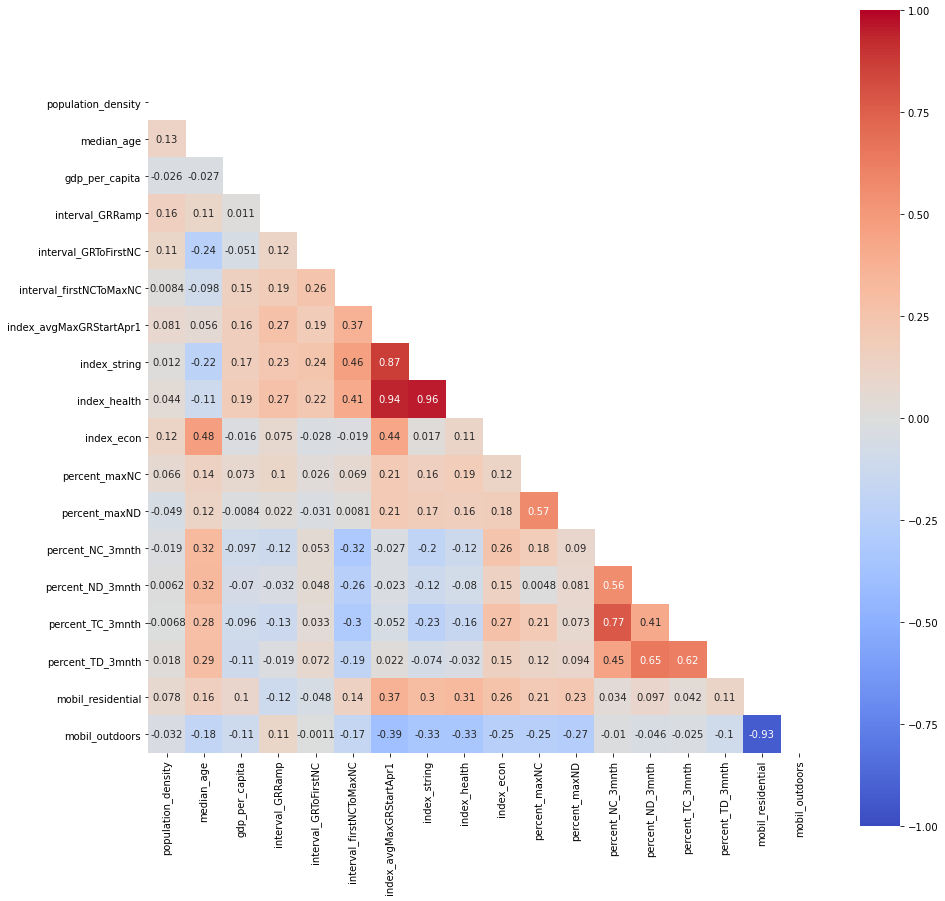

In [4]:
# create heatmap
fig,ax = plt.subplots(figsize=(15,15))
matrix = np.triu(heatmap_df.corr())
svm = sns.heatmap(heatmap_df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, mask=matrix)
plt.show()

figure = svm.get_figure()    
figure.savefig('heatmap.png', dpi=400)

## Target Variables

10


,interval_firstNCToMaxNC,interval_firstNCToMaxND,value_maxNC,value_maxND,value_NC_3mnth,value_TC_3mnth,value_ND_3mnth,value_TD_3mnth,percent_newTestsMean,value_totTestsSlope
0,76,133,1063.0,56.0,33.0,75.0,0.0,1.0,0.000000,0.000000
1,169,139,178.0,6.0,6.0,383.0,0.0,22.0,0.000000,0.000000
2,135,38,675.0,42.0,65.0,367.0,4.0,25.0,0.000000,0.000000
3,135,130,180.0,6.0,0.0,24.0,0.0,2.0,0.000000,0.000000
4,179,175,11730.0,323.0,0.0,1133.0,3.0,34.0,0.000189,0.088563
...,...,...,...,...,...,...,...,...,...,...
157,150,168,2133.0,17.0,8.0,189.0,0.0,9.0,0.000064,0.054348
158,184,201,50.0,4.0,0.0,16.0,0.0,0.0,0.000000,0.000000
159,67,94,116.0,52.0,0.0,34.0,0.0,7.0,0.000300,0.104640
160,121,118,527.0,40.0,4.0,52.0,0.0,2.0,0.000000,0.000000


interval_firstNCToMaxNC    0
interval_firstNCToMaxND    0
value_maxNC                0
value_maxND                0
value_NC_3mnth             0
value_TC_3mnth             0
value_ND_3mnth             0
value_TD_3mnth             0
percent_newTestsMean       0
value_totTestsSlope        0
dtype: int64

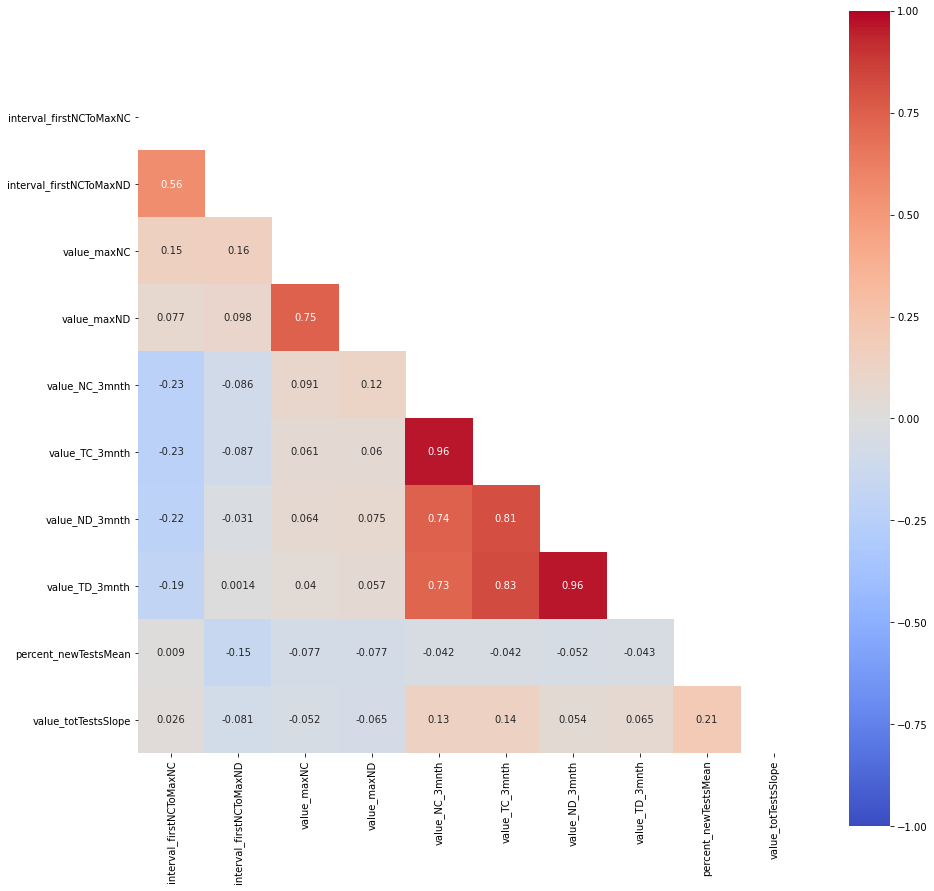

In [5]:
# create df for heatmap (but just target variables - showing that cases & deaths are correlated)
columns = ['interval_firstNCToMaxNC',
       'interval_firstNCToMaxND',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth','percent_newTestsMean','value_totTestsSlope']

print(len(columns))

heatmap_df = df[columns]
display(heatmap_df)

# fill null values with zero
display(heatmap_df.isnull().sum())

# create heatmap
fix,ax = plt.subplots(figsize=(15,15))
matrix = np.triu(heatmap_df.corr())
sns.heatmap(heatmap_df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, mask=matrix)
plt.show()

10


,interval_firstNCToMaxNC,interval_firstNCToMaxND,percent_maxNC,percent_maxND,percent_NC_3mnth,percent_ND_3mnth,percent_TC_3mnth,percent_TD_3mnth,percent_newTestsMean,value_totTestsSlope
0,76,133,0.002731,0.000144,0.000085,0.000000,0.000193,0.000003,0.000000,0.000000
1,169,139,0.006185,0.000208,0.000208,0.000000,0.013309,0.000764,0.000000,0.000000
2,135,38,0.001539,0.000096,0.000148,0.000009,0.000837,0.000057,0.000000,0.000000
3,135,130,0.000548,0.000018,0.000000,0.000000,0.000073,0.000006,0.000000,0.000000
4,179,175,0.025954,0.000715,0.000000,0.000007,0.002507,0.000075,0.000189,0.088563
...,...,...,...,...,...,...,...,...,...,...
157,150,168,0.007501,0.000060,0.000028,0.000000,0.000665,0.000032,0.000064,0.054348
158,184,201,0.000051,0.000004,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
159,67,94,0.000389,0.000174,0.000000,0.000000,0.000114,0.000023,0.000300,0.104640
160,121,118,0.002867,0.000218,0.000022,0.000000,0.000283,0.000011,0.000000,0.000000


interval_firstNCToMaxNC    0
interval_firstNCToMaxND    0
percent_maxNC              0
percent_maxND              0
percent_NC_3mnth           0
percent_ND_3mnth           0
percent_TC_3mnth           0
percent_TD_3mnth           0
percent_newTestsMean       0
value_totTestsSlope        0
dtype: int64

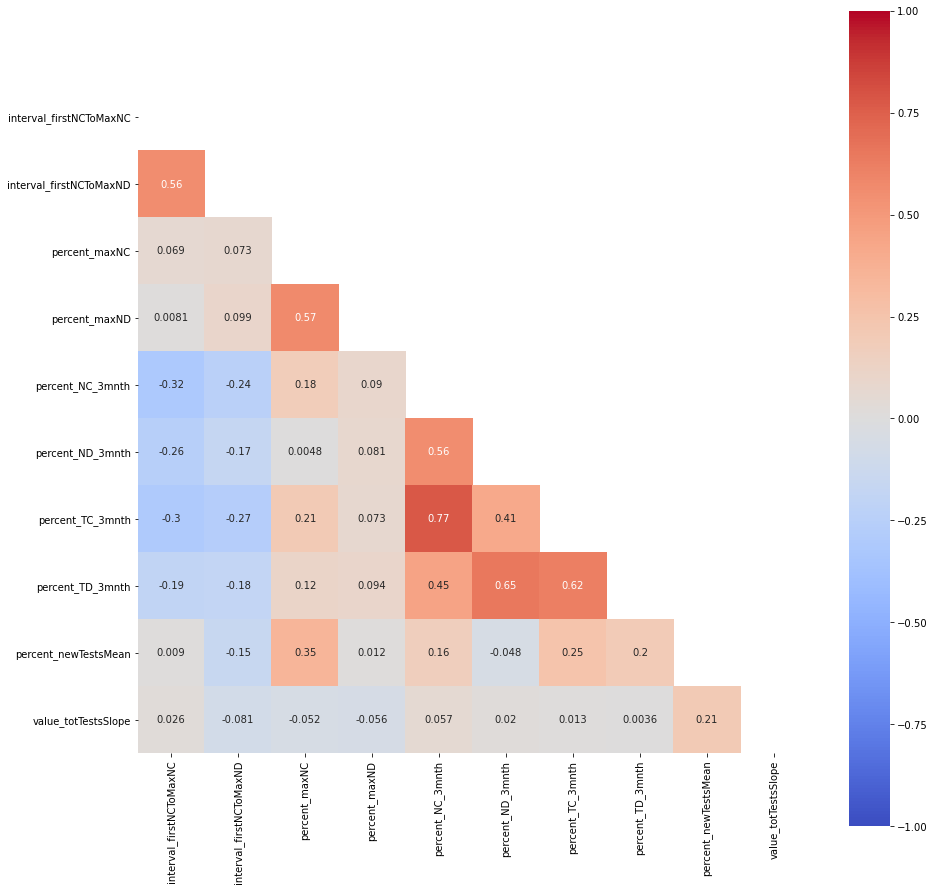

In [6]:
# create df for heatmap (to show any correlations with avg new tests per day or rate of increase of total tests
# both over 3 MO period)
columns = ['interval_firstNCToMaxNC',
       'interval_firstNCToMaxND','percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean','value_totTestsSlope']

print(len(columns))

heatmap_df = df[columns]
display(heatmap_df)

# fill nan with zero
display(heatmap_df.isnull().sum())

# create heatmap
fix,ax = plt.subplots(figsize=(15,15))
matrix = np.triu(heatmap_df.corr())
sns.heatmap(heatmap_df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, mask=matrix)
plt.show()

12


,population,population_density,index_MaxGR,change_GRRamp,percent_newTestsMean,value_totTestsSlope,percent_maxNC,percent_maxND,percent_NC_3mnth,percent_ND_3mnth,percent_TC_3mnth,percent_TD_3mnth
0,38928341.0,54.422,64.74,50.74,0.000000,0.000000,0.002731,0.000144,0.000085,0.000000,0.000193,0.000003
1,2877800.0,104.871,81.41,67.41,0.000000,0.000000,0.006185,0.000208,0.000208,0.000000,0.013309,0.000764
2,43851043.0,17.348,78.85,64.85,0.000000,0.000000,0.001539,0.000096,0.000148,0.000009,0.000837,0.000057
3,32866268.0,23.890,75.64,61.64,0.000000,0.000000,0.000548,0.000018,0.000000,0.000000,0.000073,0.000006
4,45195777.0,16.177,91.03,77.03,0.000189,0.088563,0.025954,0.000715,0.000000,0.000007,0.002507,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...
157,28435943.0,36.253,75.64,61.64,0.000064,0.054348,0.007501,0.000060,0.000028,0.000000,0.000665,0.000032
158,97338583.0,308.127,85.90,71.90,0.000000,0.000000,0.000051,0.000004,0.000000,0.000000,0.000016,0.000000
159,29825968.0,53.508,40.38,26.38,0.000300,0.104640,0.000389,0.000174,0.000000,0.000000,0.000114,0.000023
160,18383956.0,22.995,63.14,49.14,0.000000,0.000000,0.002867,0.000218,0.000022,0.000000,0.000283,0.000011


population              0
population_density      0
index_MaxGR             0
change_GRRamp           0
percent_newTestsMean    0
value_totTestsSlope     0
percent_maxNC           0
percent_maxND           0
percent_NC_3mnth        0
percent_ND_3mnth        0
percent_TC_3mnth        0
percent_TD_3mnth        0
dtype: int64

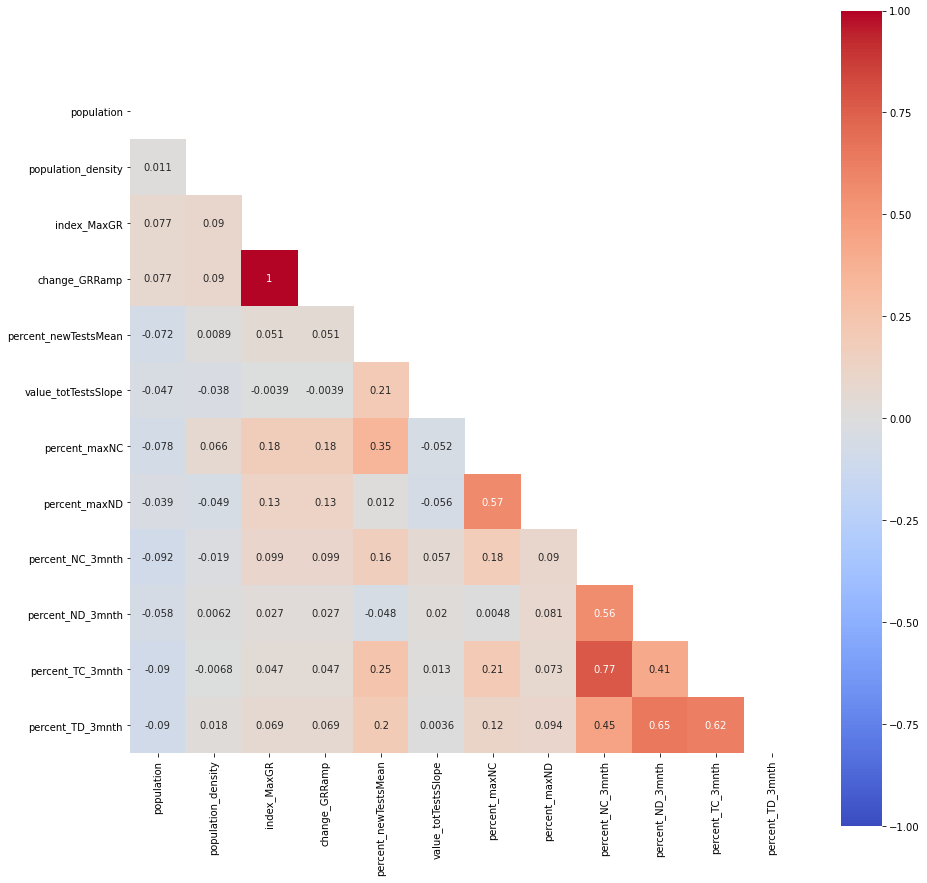

In [7]:
# create df for heatmap to show any correlations of target variables with remaining feature variables
columns = ['population', 'population_density', 'index_MaxGR',
       'change_GRRamp','percent_newTestsMean', 'value_totTestsSlope','percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth']

print(len(columns))

heatmap_df = df[columns]
display(heatmap_df)

# fill null values with zero
display(heatmap_df.isnull().sum())

# create heatmap
fix,ax = plt.subplots(figsize=(15,15))
matrix = np.triu(heatmap_df.corr())
sns.heatmap(heatmap_df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, mask=matrix)
plt.show()

# Graph regression for log variables
### log removes the correlations seen in absolute value data and percentage data
### conclusion: use log before any abstract statistics But use percent variables for visualizations

In [8]:
# Create a function to create perform linear regression
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    
    # Run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    # Print linear regression outputs
    print(linregress(x_values, y_values))

In [9]:
columns = ['logInterval_maxNC','logInterval_maxND']
logInterval_df = df[columns]
logInterval_df = logInterval_df.dropna()
display(logInterval_df.isnull().sum())

logInterval_maxNC    0
logInterval_maxND    0
dtype: int64

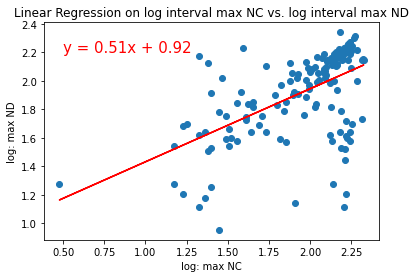

LinregressResult(slope=0.5120241783862695, intercept=0.9199963533824729, rvalue=0.5537302409749839, pvalue=6.501569853236814e-14, stderr=0.06204665955768806)


In [10]:
# Linear regression
x_values = logInterval_df["logInterval_maxNC"]
y_values = logInterval_df['logInterval_maxND']
x_label = "log: max NC"
y_label = "log: max ND"
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on log interval max NC vs. log interval max ND', 
                       x_label, y_label, (0.5,2.2))

logPercent_maxNC    0
logPercent_maxND    0
dtype: int64

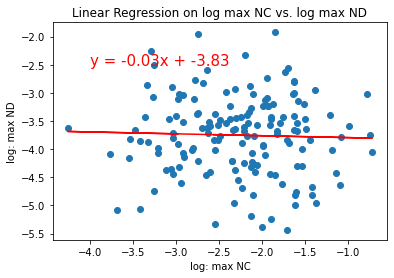

LinregressResult(slope=-0.03350631017142632, intercept=-3.8283481274285056, rvalue=-0.03251109734519125, pvalue=0.6870186688397881, stderr=0.0830051379711245)


In [11]:
columns = ['logPercent_maxNC','logPercent_maxND']
logMax_df = df[columns]
logMax_df = logMax_df.dropna()
display(logMax_df.isnull().sum())

# Linear regression
x_values = logMax_df["logPercent_maxNC"]
y_values = logMax_df['logPercent_maxND']
x_label = "log: max NC"
y_label = "log: max ND"
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on log max NC vs. log max ND', 
                       x_label, y_label, (-4,-2.5))

logPercent_NC_3mnth    0
logPercent_ND_3mnth    0
dtype: int64

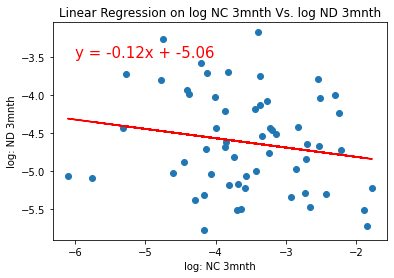

LinregressResult(slope=-0.12299236822514034, intercept=-5.061073313588089, rvalue=-0.17933474229113036, pvalue=0.17798321606627823, stderr=0.0901615331195607)


In [12]:
columns = ['logPercent_NC_3mnth','logPercent_ND_3mnth']
logNew3mnth_df = df[columns]
logNew3mnth_df = logNew3mnth_df.dropna()
display(logNew3mnth_df.isnull().sum())

# Linear regression
x_values = logNew3mnth_df["logPercent_NC_3mnth"]
y_values = logNew3mnth_df['logPercent_ND_3mnth']
x_label = "log: NC 3mnth"
y_label = "log: ND 3mnth"
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on log NC 3mnth Vs. log ND 3mnth', 
                       x_label, y_label, (-6,-3.5))

logPercent_NC_3mnth    0
logPercent_ND_3mnth    0
dtype: int64

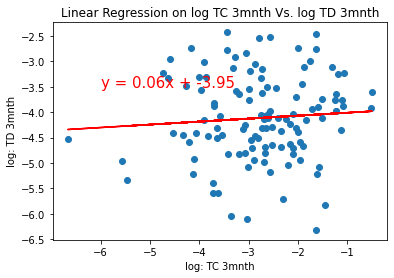

LinregressResult(slope=0.0583235810661031, intercept=-3.9517952023540452, rvalue=0.07542155308670506, pvalue=0.4169504079420544, stderr=0.07159471534507744)


In [13]:
columns = ['logPercent_TC_3mnth','logPercent_TD_3mnth']
logTot3mnth_df = df[columns]
logTot3mnth_df = logTot3mnth_df.dropna()
display(logNew3mnth_df.isnull().sum())

# Linear regression
x_values = logTot3mnth_df["logPercent_TC_3mnth"]
y_values = logTot3mnth_df['logPercent_TD_3mnth']
x_label = "log: TC 3mnth"
y_label = "log: TD 3mnth"
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on log TC 3mnth Vs. log TD 3mnth', 
                       x_label, y_label, (-6,-3.5))